# imgMS example usage

imgMS is a python package aimed for LA-ICP-MS data reduction. This example shows a minimalistic use of this package for bulk analysis. (In the future this example will also show elemental imaging.)

In [1]:
from imgMS import MSData
from imgMS import MSEval
from imgMS.side_functions import *

### Create Logger
Using function get_logger you can create logfile, where all steps of the analysis and recomendations will be saved. 

In [2]:
logger = get_logger('/Users/nikadilli/code/imgMS/log.txt')
logger.info('Starting new session.')

### Create Reader
DataReader is a class handling the import of measurement. You can use sample data included in imgMS package. For help use ?MSData.DataReader. 

In [13]:
reader = MSData.DataReader(filename='../data/data.csv', filetype='csv', instrument='raw')

### Create MSData object
MSData object is the top level object storing whole analysis and offers methods for data reduction.

In [14]:
data = MSData.MSData(reader, logger)

### Add reference values
Read standard reference material. This excel file is included in the package and contains few NIST values. If you need any reference material, you can simply edit the excel file.

In [15]:
data.read_srms()

### Import Iolite
.Iolite.csv file is a file exported from NWR laser ablation instruments using Chromium software. This file contains names as well as timestamps of individual analysis (such as spots or line scans) and is essential for selection of peaks in MSData. (Although there is other way for selecting peaks, it is recomended to use Iolite file.)

In [16]:
io = MSEval.Iolite('../data/Iolite.csv')

### Peak selection
Using iolite object we can select peaks in the time resolved analysis. It is necessary to specify start (in secon) of the first peak to synchronise Iolite file and MS data.

In [23]:
data.select('iolite', s=30, iolite=io)

### Visualise and check the results

MSData offers a simple way to plot selection of peaks, where peaks are highighted by green and background is highlighted by red colour.

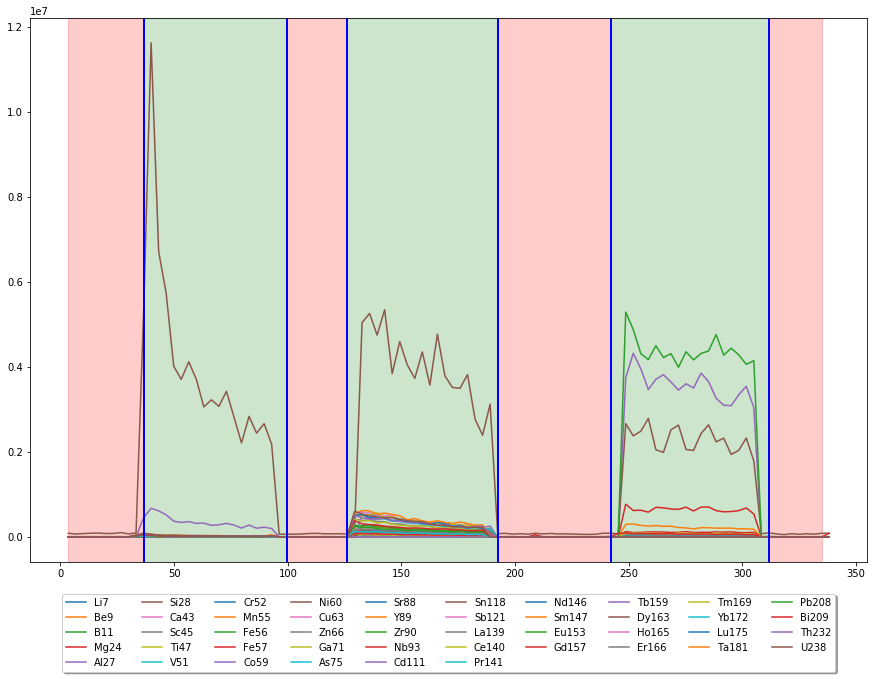

In [24]:
fig, ax = plt.subplots (figsize=(15,10))
data.graph(ax=ax)

### Set peak names
To diferentiate single peaks especially to know the SRM a list of names for peaks needs to be passed to MSdata. If Iolite is used, it can take names directly from the Iolite file. 

In [28]:
data.names = io.names_from_iolite()

### Calculate average peaks
For each measured peak we need average value, this can be calculated 2 ways, by average intensity or integrating the area under the curve. In both cases we need to extract background values which offers also multiple ways. There is also an option for despiking before calculating the average.

In [29]:
data.average_isotopes(despiked=True, bcgcor_method='all', method='intensity')

,Li7,Be9,B11,Mg24,Al27,Si28,Ca43,Sc45,Ti47,V51,...,Ho165,Er166,Tm169,Yb172,Lu175,Ta181,Pb208,Bi209,Th232,U238
NIST612,2651.331930,505.799298,273.073333,2699.358772,3.075463e+05,3.443354e+06,9813.409965,3729.635965,295.615789,4774.944737,...,27097.557719,9214.239649,28800.219825,6399.410175,25073.153684,30986.420877,12707.553333,16958.621404,25689.357368,25611.950702
NIST610,28340.727833,6226.432833,2329.008000,20854.536667,2.866461e+05,3.254849e+06,9220.248333,42675.675000,2999.880333,58854.366333,...,335711.508333,110566.903167,325072.656000,73554.394333,295490.727833,365916.165167,134403.177000,185171.986833,285350.032167,309300.778333
VES,4447.862222,437.150476,162.142857,522390.460952,2.911306e+06,1.791551e+06,29553.157619,456.736764,36757.053016,10833.219524,...,706.371905,768.280000,371.911111,561.126190,309.369206,204.285714,735.578889,59643.841648,1654.724921,1576.301746


### Quantify the sample
In previous step an average intensity for each peak was calculated. There are 2 reference materials and one sample. The SRM with values closer to the sample should be used for quantification, the second SRM is used as a controll sample.

In [30]:
data.quantify_isotopes(srm_name='NIST612')

,Li7,Be9,B11,Mg24,Al27,Si28,Ca43,Sc45,Ti47,V51,...,Ho165,Er166,Tm169,Yb172,Lu175,Ta181,Pb208,Bi209,Th232,U238
NIST610,429.707516,461.628223,292.540372,525.350134,10013.859371,318573.764141,79907.359731,456.548427,446.507729,478.235779,...,474.498510,455.983617,415.367446,450.562189,436.050330,444.015392,407.940884,329.755224,419.760509,451.416732
VES,67.439335,32.410371,20.366324,13159.625802,101705.221543,175351.080212,256122.689073,4.886213,5470.987648,88.028017,...,0.998394,3.168426,0.475216,3.437215,0.456531,0.247887,2.232631,106.214059,2.434162,2.300573


### Calculate Detection limit
Data evaluation wouldn't be complete without detection limits. MSData offers a simple method for its calculation. Method and scale should correspond to the method and background correction method used for averaging peaks.

In [31]:
data.detection_limit(method='intensity', scale='all', )

Li7         0.394193
Be9         0.000000
B11         7.475412
Mg24        0.000000
Al27        9.038806
Si28     2432.766229
Ca43     1452.661248
Sc45        0.289134
Ti47        1.722225
V51         0.114716
Cr52        0.778781
Mn55        0.871185
Fe56       12.199115
Fe57       22.659666
Co59        0.000000
Ni60        0.835298
Cu63        0.131373
Zn66        1.350749
Ga71        0.149154
As75        6.844136
Sr88        0.000000
Y89         0.000000
Zr90        0.000000
Nb93        0.000000
Cd111       0.000000
Sn118       4.025223
Sb121       0.264762
La139       0.000000
Ce140       0.000000
Pr141       0.000000
Nd146       0.000000
Sm147       0.000000
Eu153       0.000000
Gd157       0.000000
Tb159       0.000000
Dy163       0.000000
Ho165       0.000000
Er166       0.000000
Tm169       0.000000
Yb172       0.000000
Lu175       0.000000
Ta181       0.000000
Pb208       0.057954
Bi209       0.042466
Th232       0.000000
U238        0.000000
Name: lod, dtype: float64

### Clean the data

MSData offers a report method, which will round all values to reasonable number of decimal numbers and replace all values under the detection limit.

In [33]:
data.report()

### Export
The last step is to get the results in a format that can be shared or published. MSData exports all steps of the analysis into single excel file. 

In [34]:
data.export('../data/results.xlsx')